In [1]:
import pandas as pd

colunas = ['PROCESSO', 'EMENTA', 'ROTULO_MANUAL']

df = pd.read_csv('../data/ementas_rotulos_manual.csv', header=0, sep=',', quotechar='"', usecols=colunas)

In [2]:
df.head()

,PROCESSO,EMENTA,ROTULO_MANUAL
0,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC
1,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC
2,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. SUSCITAÇÃO DE C...,CDC
3,00024255420138240081,<br> APELAÇÃO CÍVEL. AÇÃO DE INDENIZAÇÃO POR...,DAN
4,00176621120138240023,<br> APELAÇÃO CÍVEL. AÇÃO INDENIZATÓRIA POR ...,DAN


In [3]:
def tratar_texto(texto):
    texto = texto.lower()
    texto = texto.replace('<br>', '')
    return texto

In [4]:
def abreviacoes(texto):
    texto = texto.replace('art.', 'artigo')
    return texto

In [5]:
import string

remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def remover_pontuacao(texto):
    return texto.translate(remove_punctuation_map)

In [6]:
from stop_words import get_stop_words

stop_words_pt = get_stop_words("pt")

def remover_stop_words(texto):
    words = [word for word in texto.split() if len(word) > 1 and word not in stop_words_pt]
    return ' '.join(words)

In [7]:
import re
from nltk import tokenize
from unidecode import unidecode

def normalizar(texto):
    texto = tratar_texto(texto)
    texto = remover_pontuacao(texto)
           
    # quebra em palavras
    texto = remover_stop_words(texto)
    
    # remover acentuação
    texto = unidecode(texto)
    
    #removendo números
    texto = re.sub('[^a-zA-Z ]+', '', texto)

    return texto

In [8]:
df['EMENTA'][1]

'<br>   APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C REPETIÇÃO DE INDÉBITO. PLANO DE SAÚDE FECHADO OFERECIDO POR OPERADORA DE AUTOGESTÃO (GEAP). REAJUSTE DE MENSALIDADE EM RAZÃO DA FAIXA ETÁRIA. SENTENÇA DE PROCEDÊNCIA. APELO DA RÉ. NULIDADE DO REAJUSTE NÃO VERIFICADA À LUZ DAS DIRETRIZES TRAÇADAS EM JULGAMENTO PARADIGMÁTICO DO STJ - RESP N. 1568244, AFETADO AO RITO DOS RECURSOS REPRESENTATIVOS DE CONTROVÉRSIA. SENTENÇA DE PROCEDÊNCIA REFORMADA. APELO PROVIDO.<br>   "O reajuste de mensalidade de plano de saúde individual ou familiar fundado na mudança de faixa etária do beneficiário é válido desde que (i) haja previsão contratual, (ii) sejam observadas as normas expedidas pelos órgãos governamentais reguladores e (iii) não sejam aplicados percentuais desarrazoados ou aleatórios que, concretamente e sem base atuarial idônea, onerem excessivamente o consumidor ou discriminem o idoso.<br>   (...)<br>   A abusividade dos aumentos das mensalidades de plano de saúde por inserção do usuário em nova 

In [9]:
normalizar(df['EMENTA'][1])

'apelacao civel acao declaratoria cc repeticao indebito plano saude fechado oferecido operadora autogestao geap reajuste mensalidade razao faixa etaria sentenca procedencia apelo re nulidade reajuste verificada luz diretrizes tracadas julgamento paradigmatico stj resp  afetado rito recursos representativos controversia sentenca procedencia reformada apelo provido reajuste mensalidade plano saude individual familiar fundado mudanca faixa etaria beneficiario valido desde previsao contratual ii observadas normas expedidas orgaos governamentais reguladores iii aplicados percentuais desarrazoados aleatorios concretamente base atuarial idonea onerem excessivamente consumidor discriminem idoso abusividade aumentos mensalidades plano saude insercao usuario nova faixa risco sobretudo participantes idosos devera ser aferida cada caso concreto tal reajuste adequado razoavel sempre percentual majoracao justificado atuarialmente permitir continuidade contratual tanto jovens quanto idosos bem sobrev

É possível verificar nesse exemplo que as palavras mais utilizadas se referem ao "Superior Tribunal de Justiça" e "Justiça Federal", o que não colabora para a identificação do tema abordado.

In [10]:
from nltk.probability import FreqDist

words = normalizar(df['EMENTA'][5]).split()
fdist = FreqDist(words)

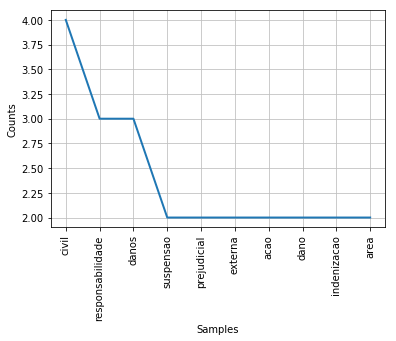

In [18]:
fdist.plot(10,cumulative=False)

In [12]:
df['EMENTA_NORM'] = df['EMENTA'].apply(lambda e: normalizar(e))

In [13]:
import nltk

nltk.download('rslp')

from nltk.stem import RSLPStemmer

stemmer = RSLPStemmer()

def radical(texto):
    words = [stemmer.stem(word) for word in texto.split()]
    return ' '.join(words)

[nltk_data] Downloading package rslp to /home/piantino/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [14]:
df['EMENTA_STEM'] = df['EMENTA_NORM'].apply(lambda e: radical(e))

In [15]:
df['EMENTA_STEM'][1]

'apelaca civel aca declar cc repetica indebit plan saud fech oferec oper autogesta geap reajust mensal raza faix et sentenc procedenc apel re nulidad reajust verific luz diretriz trac julg paradigma stj resp afet rit recurs represent controvers sentenc procedenc reform apel prov reajust mensal plan saud individ famili fund mudanc faix et beneficiari val desd previsa contrat ii observ norm exped orga governament regul iii aplic percent desarrazo aleatori concret bas atuar idone oner excessiv consum discrimin idos abusiv aument mensal plan saud inserca usuari nov faix risc sobretud particip idos dev ser afer cad cas concret tal reajust adequ razoa sempr percent majoraca justific atuar permit continu contrat tant jov quant idos bem sobrevivenc propri fund mutu resp rj rel ministr ricard vill boa cuev segund seca julg dje'

In [16]:
df.to_csv('../data/ementas_pre-processadas.csv')

In [17]:
import nltk

nltk.download('mac_morpho')
nltk.download('punkt')

tagged_sents = nltk.corpus.mac_morpho.tagged_sents()
texto = df['EMENTA'][1]
tokens = nltk.word_tokenize(texto)
unigram_tagger = nltk.tag.UnigramTagger(tagged_sents)
unigram_tagger.tag(tokens)

[nltk_data] Downloading package mac_morpho to
[nltk_data]     /home/piantino/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package punkt to /home/piantino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('<', None),
 ('br', 'N'),
 ('>', None),
 ('APELAÇÃO', None),
 ('CÍVEL', None),
 ('.', '.'),
 ('AÇÃO', None),
 ('DECLARATÓRIA', None),
 ('C/C', None),
 ('REPETIÇÃO', None),
 ('DE', 'NPROP'),
 ('INDÉBITO', None),
 ('.', '.'),
 ('PLANO', None),
 ('DE', 'NPROP'),
 ('SAÚDE', None),
 ('FECHADO', None),
 ('OFERECIDO', None),
 ('POR', None),
 ('OPERADORA', None),
 ('DE', 'NPROP'),
 ('AUTOGESTÃO', None),
 ('(', '('),
 ('GEAP', None),
 (')', ')'),
 ('.', '.'),
 ('REAJUSTE', None),
 ('DE', 'NPROP'),
 ('MENSALIDADE', None),
 ('EM', None),
 ('RAZÃO', None),
 ('DA', 'NPROP'),
 ('FAIXA', None),
 ('ETÁRIA', None),
 ('.', '.'),
 ('SENTENÇA', None),
 ('DE', 'NPROP'),
 ('PROCEDÊNCIA', None),
 ('.', '.'),
 ('APELO', None),
 ('DA', 'NPROP'),
 ('RÉ', None),
 ('.', '.'),
 ('NULIDADE', None),
 ('DO', None),
 ('REAJUSTE', None),
 ('NÃO', None),
 ('VERIFICADA', None),
 ('À', 'NPROP'),
 ('LUZ', None),
 ('DAS', None),
 ('DIRETRIZES', None),
 ('TRAÇADAS', None),
 ('EM', None),
 ('JULGAMENTO', None),
 ('PARADIGMÁ